# Introduction to seaborn

Seaborn is a high-level data visualization package. It provides commands that let you state *what* you want to see, rather than having to specify exactly *how* it should look.

```{note}
Python has many graphics packages with different niches. The most widespread is Matplotlib, which is what seaborn is built on top of. If you want to deeply customize a seaborn plot, it is possible, but we won't get into the details.
```

We will illustrate some concepts using a data set that is provided within seaborn.

In [1]:
import pandas as pd
import seaborn as sns

cars = sns.load_dataset("mpg")
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## Histogram

One of the fastest ways to become familiar with a data set is to visualize it. To visualize a distribution of continuous values, we can use a **histogram**. We choose ordered real values $t_1 < t_2 < \cdots < t_m$. Define *bin* $k$ to be the interval $B_k=[t_k,t_{k+1})$, with the convention that $t_0=-\infty$ and $t_{m+1}=\infty$. This gives us a series of counts $c_k$, where $c_k$ is defined as the number of data values in interval $B_k$. A histogram plots those counts, typically using a bar graph.

In seaborn, you plot a histogram using `displot`.

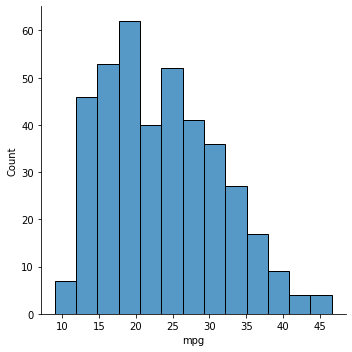

In [2]:
sns.displot(data=cars,x="mpg");

You can specify the number of bins used (or their edges).

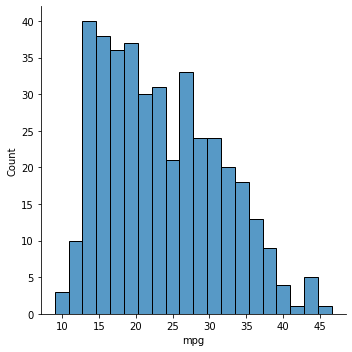

In [3]:
sns.displot(data=cars,x="mpg",bins=20);

We can use categorical variables to define groups within the data set. In this case, we use different colors (hues) for the three unique values of `origin`.

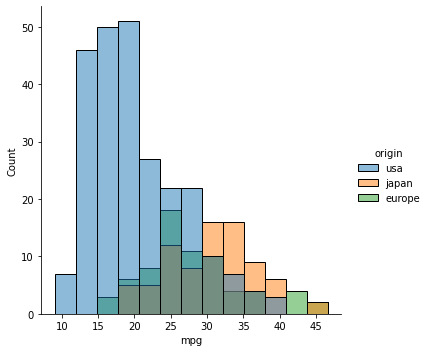

In [4]:
sns.displot(data=cars,x="mpg",hue="origin");

That graph might be hard to read because of the overlaps. We can instead plot the groups in separate columns.

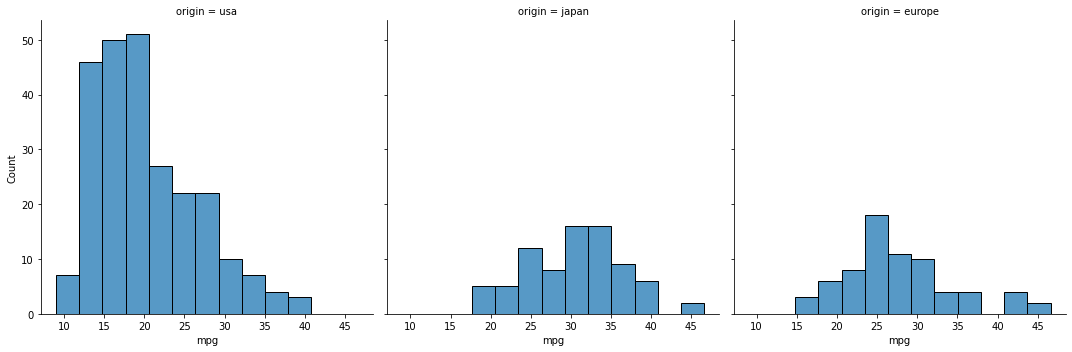

In [5]:
sns.displot(data=cars,x="mpg",col="origin");

It's now clear that the U.S. cars are more clustered on the left (smaller MPG) than are the Japanese and European cars.

You can combine using columns for one category with colors for another. Note that here we also direct seaborn to stack different colored bars rather than overlapping them.

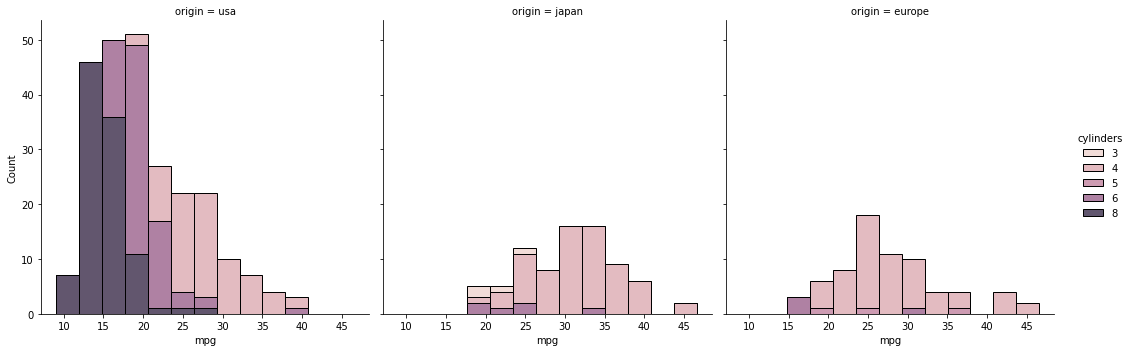

In [6]:
sns.displot(data=cars,x="mpg",col="origin",hue="cylinders",multiple="stack");

## Distribution functions

The **cumulative distribution function** (CDF) $F(x)$ is the probability that a data value will be less than or equal to $x$. The domain of $F$ is the real line (unless otherwise restricted), and the range is the interval $[0,1]$.

When a sample is used to estimate a continuous CDF, the resulting is a stair-step (piecewise constant) graph known as the **empirical CDF**.

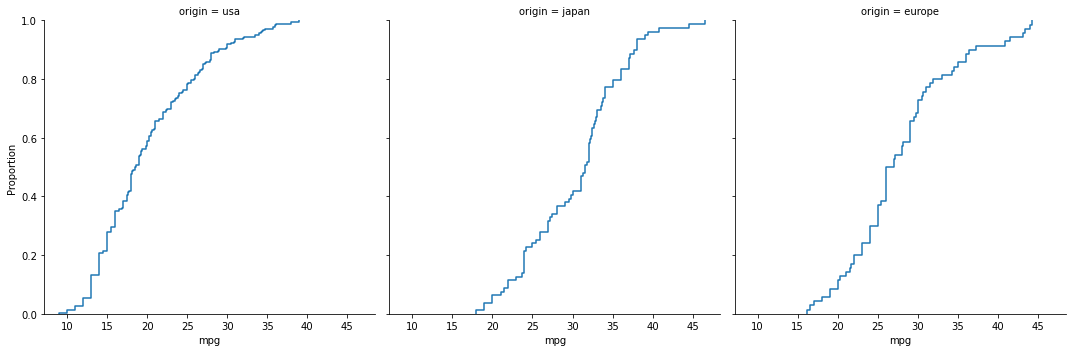

In [7]:
sns.displot(data=cars,x="mpg",col="origin",kind="ecdf");

If we could account for infinitely many observations, we would expect (in typical cases) the CDF to be continuous and differentiable. The derivative of the CDF, $f(x)=F'(x)$, is called the **probability distribution function** (PDF). The PDF is the continuous analog of a histogram divided into infinitesimally small bins. Note that because the probability of observing *some* real value is 100%, we have the normalization constraint

$$
\int_{-\infty}^\infty f(x)\, dx = 1.
$$

## Normal distribution

The granddaddy of distributions is the **normal** or **Gaussian** distribution. It is parameterized by its mean $\mu$ and standard deviation $\sigma$, and has PDF

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x-\mu)^2}{2\sigma^2} \right).
$$

The CDF cannot be expressed using elementary functions. A normal PDF is peaked at the mean, dropping superexponentially and symmetrically on both sides.

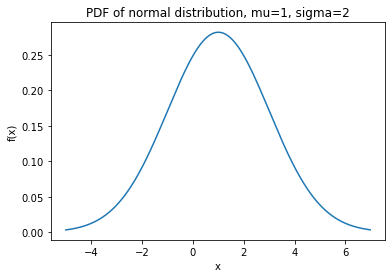

In [8]:
import numpy as np
import matplotlib.pyplot as plt

mu = 1
sigma = 2
x = mu + np.arange(-200,200)*12/400
s = np.sqrt(2*np.pi*sigma)
plt.plot(x,np.exp(-(x-mu)**2/(2*sigma*2))/s)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("PDF of normal distribution, mu=1, sigma=2");

## Kernel density estimation

It can be helpful to go from a discrete distribution, as described by a histogram, to a continuous function that approximates the PDF. One technique to do this is called **kernel density estimation** (KDE).

Let $g(x)$ be a normal distribution with mean zero and a chosen variance. If we have samples $x_1,\ldots,x_n$, define

$$
\tilde{f}(x) = \sum_{i=1}^n g(x-x_i).
$$

That is, we add up normal distributions centered at the observed values. Finally, we define

$$
\frac{\tilde{f}(x) }{\int_{-\infty}^\infty \tilde{f}(x) \, dx}
$$

as the KDE approximation to the PDF.

For example, using the MPG data:

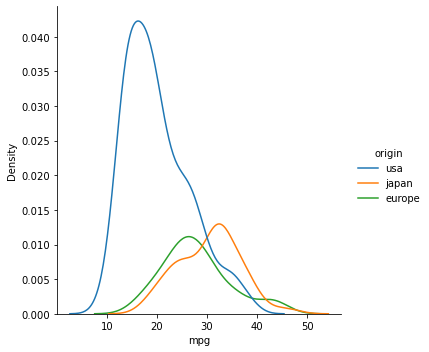

In [9]:
sns.displot(data=cars,x="mpg",hue="origin",kind="kde");

Based on these curves, it would be plausible to approximate the distribution of cars from Europe as a normal distribution, but the asymmetry in the other two cases would make that approximation less satisfactory.